In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Step 1: Create a synthetic heart disease dataset
np.random.seed(42)

# Creating the dataset with 300 samples
data = {
    'age': np.random.randint(29, 77, 300),
    'sex': np.random.choice([0, 1], 300),  # 1 = male, 0 = female
    'cp': np.random.choice([0, 1, 2, 3], 300),  # chest pain type (0-3)
    'trestbps': np.random.randint(94, 200, 300),  # resting blood pressure
    'cholesterol': np.random.randint(126, 564, 300),
    'fbs': np.random.choice([0, 1], 300),  # fasting blood sugar > 120 mg/dl (1 = true, 0 = false)
    'restecg': np.random.choice([0, 1, 2], 300),  # resting ECG results (0-2)
    'thalach': np.random.randint(71, 202, 300),  # maximum heart rate achieved
    'exang': np.random.choice([0, 1], 300),  # exercise-induced angina (1 = yes, 0 = no)
    'oldpeak': np.random.uniform(0.0, 6.2, 300),  # ST depression induced by exercise
    'slope': np.random.choice([0, 1, 2], 300),  # the slope of the peak exercise ST segment
    'ca': np.random.randint(0, 4, 300),  # number of major vessels (0-3) colored by fluoroscopy
    'thal': np.random.choice([1, 2, 3], 300),  # thalassemia (1 = normal; 2 = fixed defect; 3 = reversible defect)
    'target': np.random.choice([0, 1], 300)  # target variable (1 = heart disease, 0 = no heart disease)
}

df = pd.DataFrame(data)



In [3]:
# Step 2: Data Cleaning

# Checking for missing values
missing_values = df.isnull().sum()
print("Missing Values in the Data:\n", missing_values)

# Outlier detection and handling
# For simplicity, we'll assume data is clean, but here's how outliers could be handled:
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
for col in numerical_columns:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]



Missing Values in the Data:
 age            0
sex            0
cp             0
trestbps       0
cholesterol    0
fbs            0
restecg        0
thalach        0
exang          0
oldpeak        0
slope          0
ca             0
thal           0
target         0
dtype: int64



Descriptive Statistics:
               age         sex          cp    trestbps  cholesterol  \
count  300.000000  300.000000  300.000000  300.000000    300.00000   
mean    52.326667    0.553333    1.406667  146.463333    349.94000   
std     13.887506    0.497978    1.174402   31.162461    128.27746   
min     29.000000    0.000000    0.000000   94.000000    126.00000   
25%     40.000000    0.000000    0.000000  119.000000    241.50000   
50%     53.000000    1.000000    1.000000  148.000000    348.00000   
75%     64.000000    1.000000    2.250000  173.250000    454.25000   
max     76.000000    1.000000    3.000000  199.000000    563.00000   

              fbs     restecg     thalach       exang     oldpeak      slope  \
count  300.000000  300.000000  300.000000  300.000000  300.000000  300.00000   
mean     0.476667    0.983333  136.536667    0.523333    3.135579    0.98000   
std      0.500290    0.819733   39.209351    0.500290    1.805153    0.80525   
min      0.000000    0.

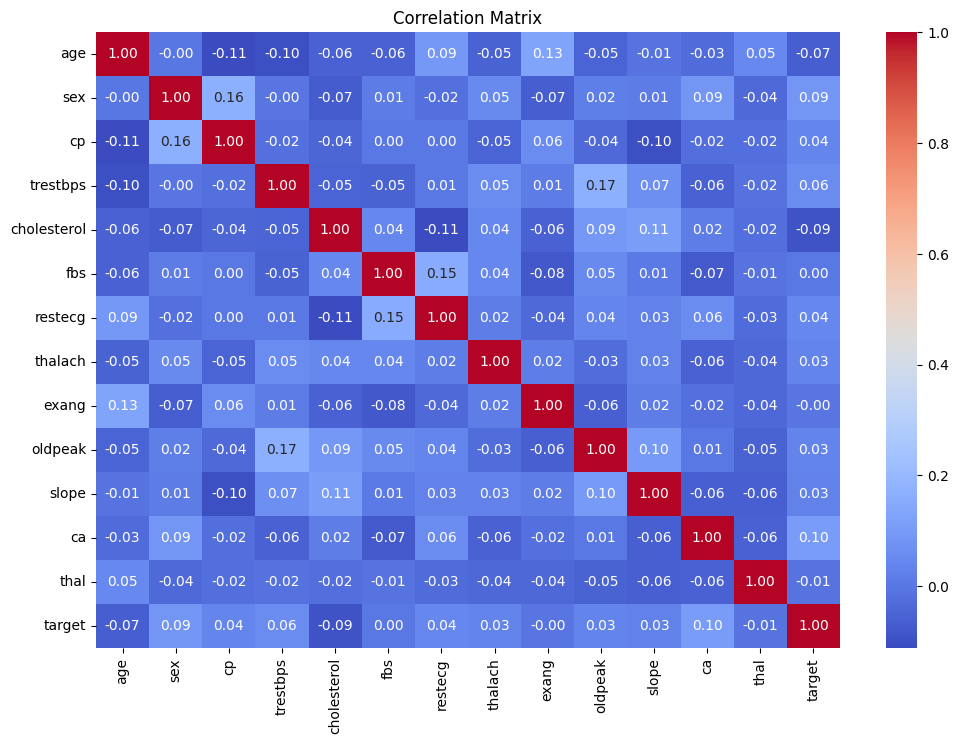

In [4]:
# Step 3: Exploratory Data Analysis (EDA)

# Descriptive statistics
print("\nDescriptive Statistics:\n", df.describe())

# Correlation matrix
correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()



In [5]:
# Step 4: Question Formulation and Analysis

# 1. What is the average age of patients with heart disease?
avg_age_hd = df[df['target'] == 1]['age'].mean()
print(f"1. Average age of patients with heart disease: {avg_age_hd:.2f} years")


1. Average age of patients with heart disease: 51.34 years


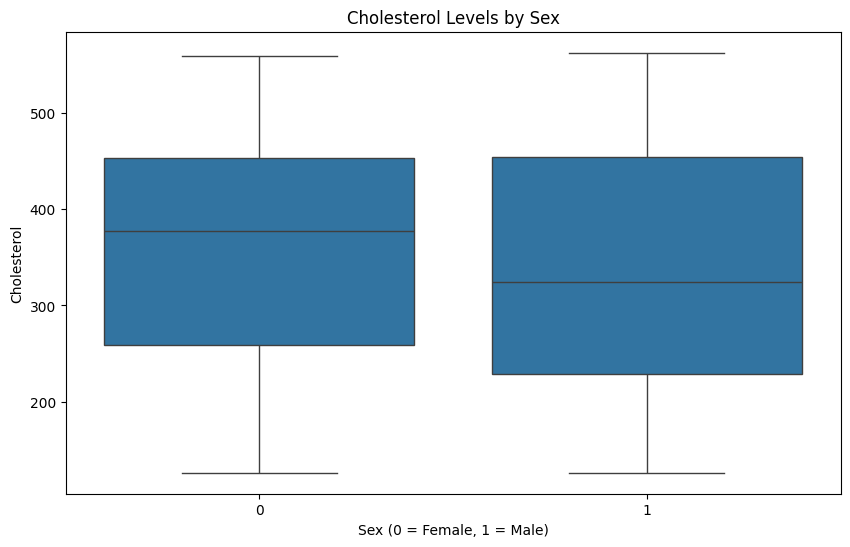

In [6]:
# 2. Is there a significant difference in cholesterol levels between men and women?
plt.figure(figsize=(10, 6))
sns.boxplot(x='sex', y='cholesterol', data=df)
plt.title('Cholesterol Levels by Sex')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.ylabel('Cholesterol')
plt.show()


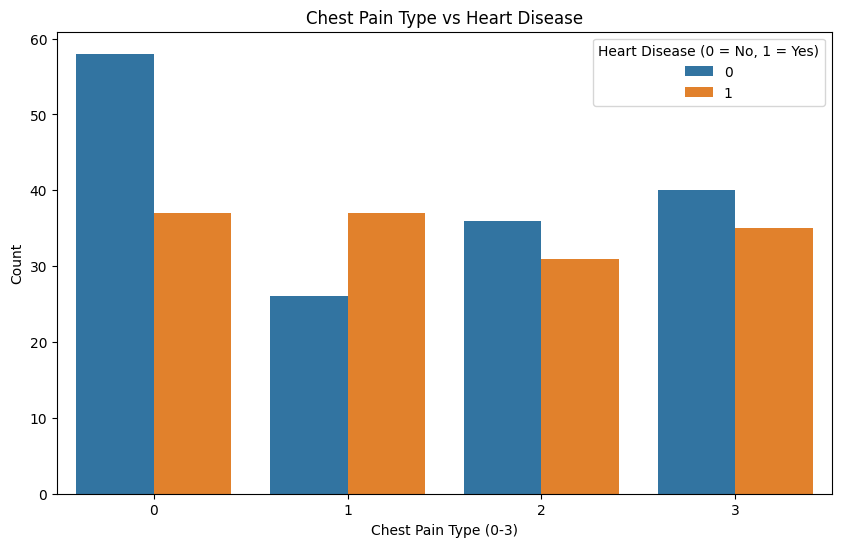

In [7]:
# 3. How does chest pain type vary with the presence of heart disease?
plt.figure(figsize=(10, 6))
sns.countplot(x='cp', hue='target', data=df)
plt.title('Chest Pain Type vs Heart Disease')
plt.xlabel('Chest Pain Type (0-3)')
plt.ylabel('Count')
plt.legend(title='Heart Disease (0 = No, 1 = Yes)')
plt.show()


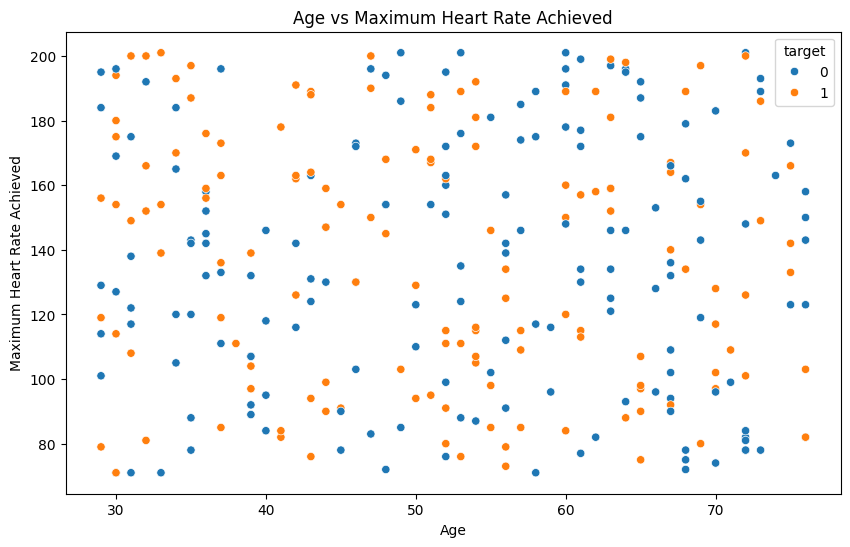

In [8]:
# 4. What is the relationship between age and maximum heart rate achieved?
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='thalach', hue='target', data=df)
plt.title('Age vs Maximum Heart Rate Achieved')
plt.xlabel('Age')
plt.ylabel('Maximum Heart Rate Achieved')
plt.show()


In [9]:
# 5. Does exercise-induced angina correlate with heart disease?
angina_hd_correlation = df['exang'].corr(df['target'])
print(f"5. Correlation between exercise-induced angina and heart disease: {angina_hd_correlation:.2f}")


5. Correlation between exercise-induced angina and heart disease: -0.00


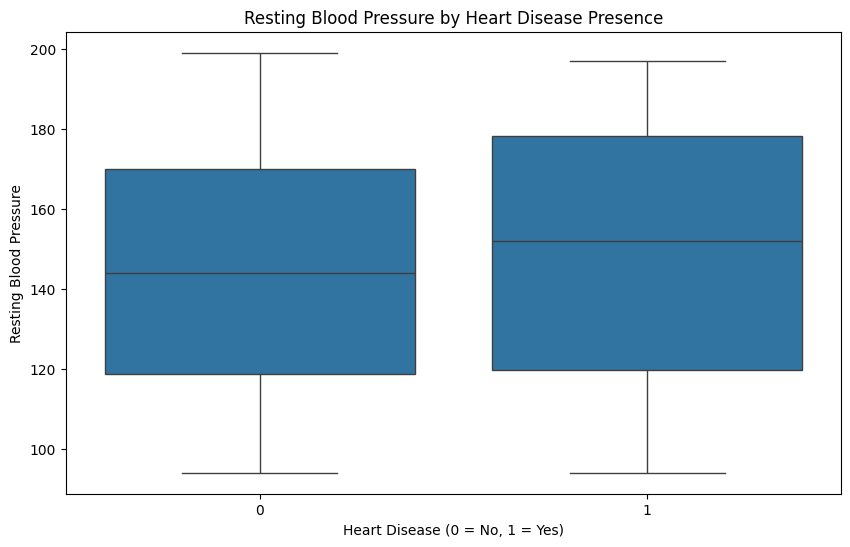

In [10]:
# 6. How does resting blood pressure vary among patients with and without heart disease?
plt.figure(figsize=(10, 6))
sns.boxplot(x='target', y='trestbps', data=df)
plt.title('Resting Blood Pressure by Heart Disease Presence')
plt.xlabel('Heart Disease (0 = No, 1 = Yes)')
plt.ylabel('Resting Blood Pressure')
plt.show()


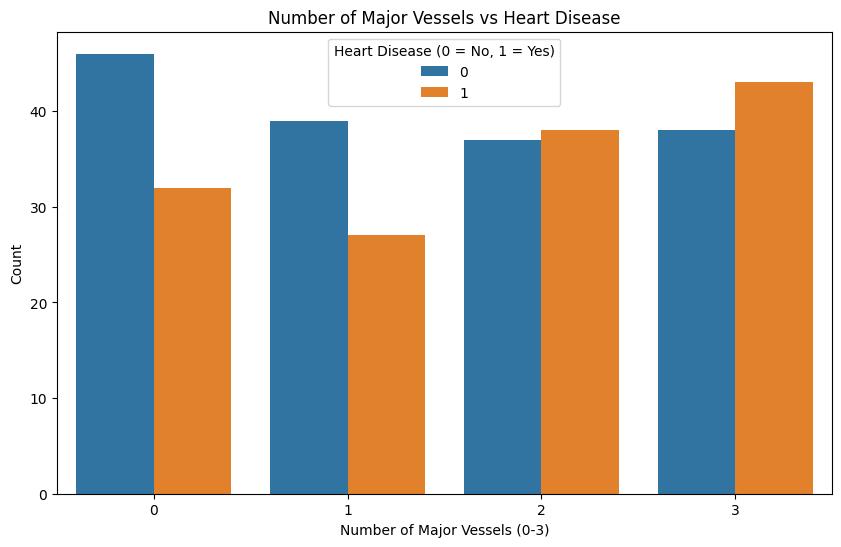

In [11]:
# 7. What is the impact of the number of major vessels colored by fluoroscopy on heart disease?
plt.figure(figsize=(10, 6))
sns.countplot(x='ca', hue='target', data=df)
plt.title('Number of Major Vessels vs Heart Disease')
plt.xlabel('Number of Major Vessels (0-3)')
plt.ylabel('Count')
plt.legend(title='Heart Disease (0 = No, 1 = Yes)')
plt.show()